# Loading the dataset from Kaggle

In [ ]:


import kagglehub

# Download latest version
path = kagglehub.dataset_download("victorcallejasf/multimodal-hate-speech")

print("Path to dataset files:", path)

100%|██████████| 5.97G/5.97G [01:00<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/victorcallejasf/multimodal-hate-speech/versions/1


## Dataset path

In [ ]:
ls /root/.cache/kagglehub/datasets/victorcallejasf/multimodal-hate-speech/versions/1

hatespeech_keywords.txt  img_resized/  img_txt/  MMHS150K_GT.json  MMHS150K_readme.txt  splits/


# Loading the json dataset file

In [ ]:
import pandas as pd
import json

# Load JSON file
with open("/root/.cache/kagglehub/datasets/victorcallejasf/multimodal-hate-speech/versions/1/MMHS150K_GT.json", "r") as f:
    data = json.load(f)

# Convert JSON to DataFrame
df = pd.DataFrame(data)
print(df.head())  # Check the first few rows

                                          1114679353714016256  \
img_url     http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...   
labels                                              [4, 1, 3]   
tweet_url   https://twitter.com/user/status/11146793537140...   
tweet_text       @FriskDontMiss Nigga https://t.co/cAsaLWEpue   
labels_str                      [Religion, Racist, Homophobe]   

                                          1063020048816660480  \
img_url     http://pbs.twimg.com/ext_tw_video_thumb/106301...   
labels                                              [5, 5, 5]   
tweet_url   https://twitter.com/user/status/10630200488166...   
tweet_text     My horses are retarded https://t.co/HYhqc6d5WN   
labels_str                  [OtherHate, OtherHate, OtherHate]   

                                          1108927368075374593  \
img_url        http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg   
labels                                              [0, 0, 0]   
tweet_url   https://twi

# Downloading image file in the dataset in a separate folder

In [ ]:
import os
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import numpy as np

## Load dataset function to download images from the links in the dataset

In [ ]:
def load_dataset(data_path, output_dir="dataset", num_samples=10000):
    """
    Load the first `num_samples` samples from the dataset, download images, and save the dataset locally.
    If a row is skipped due to an error, an extra sample is downloaded to compensate.

    Args:
        data_path (str): Path to the dataset file (e.g., MMHS150K_GT.json).
        output_dir (str): Directory to save the dataset (text, images, and labels).
        num_samples (int): Number of samples to load.

    Returns:
        pd.DataFrame: A DataFrame containing the loaded dataset with local image paths.
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(os.path.join(output_dir, "images"), exist_ok=True)

    # Load the dataset
    print("Loading dataset...")
    df = pd.read_json(data_path, orient="index")

    # Initialize lists to store valid samples
    valid_texts = []
    valid_image_paths = []
    valid_labels = []

    # Iterate through the dataset
    print("Downloading images and processing data...")
    idx = 0
    while len(valid_texts) < num_samples and idx < len(df):
        row = df.iloc[idx]
        try:
            # Download image
            image_url = row["img_url"]
            image_name = f"{df.index[idx]}.jpg"
            image_path = os.path.join(output_dir, "images", image_name)

            # Skip if image already exists
            if os.path.exists(image_path):
                print(f"Image {image_name} already exists. Skipping download.")
            else:
                response = requests.get(image_url, timeout=10)
                if response.status_code == 200:
                    image = Image.open(BytesIO(response.content))
                    image.save(image_path)
                else:
                    print(f"Failed to download image {image_url}. Skipping row.")
                    idx += 1  # Move to the next row
                    continue

            # Append valid data
            valid_texts.append(row["tweet_text"])
            valid_image_paths.append(image_path)
            valid_labels.append(row["labels"])

        except Exception as e:
            print(f"Error processing row {df.index[idx]}: {e}. Skipping row.")

        # Move to the next row
        idx += 1

    # Create a new DataFrame with valid samples
    valid_df = pd.DataFrame({
        "tweet_text": valid_texts,
        "image_path": valid_image_paths,
        "labels": valid_labels
    })

    # Save the dataset to a CSV file
    dataset_csv_path = os.path.join(output_dir, "dataset.csv")
    valid_df.to_csv(dataset_csv_path, index=False)
    print(f"Dataset saved to {dataset_csv_path}")

    return valid_df

## Downloading images from the load_dataset function created

In [ ]:
# Path to the dataset file
data_path = "/root/.cache/kagglehub/datasets/victorcallejasf/multimodal-hate-speech/versions/1/MMHS150K_GT.json"

# Load the dataset
dataset_df = load_dataset(data_path, output_dir="dataset", num_samples=50)

# Display the first few rows of the dataset
print(dataset_df.head())

Loading dataset...
Failed to download image http://pbs.twimg.com/tweet_video_thumb/D3gi9MHWAAAgfl7.jpg. Skipping row.
Failed to download image http://pbs.twimg.com/ext_tw_video_thumb/1063019643709747200/pu/img/wK5HgoX6tFfxWJmi.jpg. Skipping row.
Failed to download image http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg. Skipping row.
Image 2005-04-26 23:35:34.635618305.jpg already exists. Skipping download.
Image 2002-10-22 02:08:00.215592966.jpg already exists. Skipping download.
Failed to download image http://pbs.twimg.com/media/D1zG0qnX4AAw9SC.jpg. Skipping row.
Image 2005-04-19 14:14:03.568463874.jpg already exists. Skipping download.
Failed to download image http://pbs.twimg.com/media/D3fQcCCWAAIG8tO.jpg. Skipping row.
Image 2003-02-21 06:38:34.740666370.jpg already exists. Skipping download.
Image 2005-02-12 03:20:53.910695936.jpg already exists. Skipping download.
Failed to download image http://pbs.twimg.com/tweet_video_thumb/D39S8tbW4AIflmW.jpg. Skipping row.
Image 2005-04-28 05

In [ ]:
# Path to the dataset file
data_path = "/root/.cache/kagglehub/datasets/victorcallejasf/multimodal-hate-speech/versions/1/MMHS150K_GT.json"

# Load the dataset
dataset_df = load_dataset(data_path, output_dir="dataset", num_samples=10)

# Display the first few rows of the dataset
print(dataset_df.head())

Loading dataset...
Failed to download image http://pbs.twimg.com/tweet_video_thumb/D3gi9MHWAAAgfl7.jpg. Skipping row.
Failed to download image http://pbs.twimg.com/ext_tw_video_thumb/1063019643709747200/pu/img/wK5HgoX6tFfxWJmi.jpg. Skipping row.
Failed to download image http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg. Skipping row.
Image 2005-04-26 23:35:34.635618305.jpg already exists. Skipping download.
Image 2002-10-22 02:08:00.215592966.jpg already exists. Skipping download.
Failed to download image http://pbs.twimg.com/media/D1zG0qnX4AAw9SC.jpg. Skipping row.
Image 2005-04-19 14:14:03.568463874.jpg already exists. Skipping download.
Failed to download image http://pbs.twimg.com/media/D3fQcCCWAAIG8tO.jpg. Skipping row.
Image 2003-02-21 06:38:34.740666370.jpg already exists. Skipping download.
Image 2005-02-12 03:20:53.910695936.jpg already exists. Skipping download.
Failed to download image http://pbs.twimg.com/tweet_video_thumb/D39S8tbW4AIflmW.jpg. Skipping row.
Image 2005-04-28 05

## Checking the number of samples loaded

Number of loaded samples: 50
                                          tweet_text  \
0  RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...   
1  “EVERYbody calling you Nigger now!” https://t....   
2  @WhiteHouse @realDonaldTrump Fuck ice. White s...   
3              #sissy faggot https://t.co/bm1nk8HcYO   
4      @Gloriko_ Nigga what? https://t.co/nOwIJtgtU1   

                                         image_path     labels  
0  dataset/images/2005-04-26 23:35:34.635618305.jpg  [1, 0, 0]  
1  dataset/images/2002-10-22 02:08:00.215592966.jpg  [1, 0, 1]  
2  dataset/images/2005-04-19 14:14:03.568463874.jpg  [5, 1, 1]  
3  dataset/images/2003-02-21 06:38:34.740666370.jpg  [3, 3, 0]  
4  dataset/images/2005-02-12 03:20:53.910695936.jpg  [4, 0, 3]  


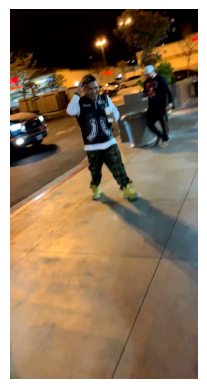

In [ ]:
# Check the number of loaded samples
print(f"Number of loaded samples: {len(dataset_df)}")

# Check the first few rows
print(dataset_df.head())

# Check if images are saved correctly
import matplotlib.pyplot as plt

# Display the first image
first_image_path = dataset_df.iloc[0]["image_path"]
first_image = Image.open(first_image_path)
plt.imshow(first_image)
plt.axis("off")
plt.show()